# ASSIGNMENT - 5 - MACHINE LEARNING LAB
### NAME - PULKIT JASTI
### ROLL NUMBER - AP19110010491
### CSE - C


Implement Principal Component Analysis Algorithm and use it to reduce the dimensions of
the Iris Dataset (from 4D to 2D). Plot the scatter plot for samples in the transformed domain
with different color codes for samples belonging to different classes.

In [1]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn import datasets
iris = datasets.load_iris()

In [3]:
type(iris)

sklearn.utils.Bunch

In [4]:
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
columns= iris['feature_names'] + ['species'])

In [5]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


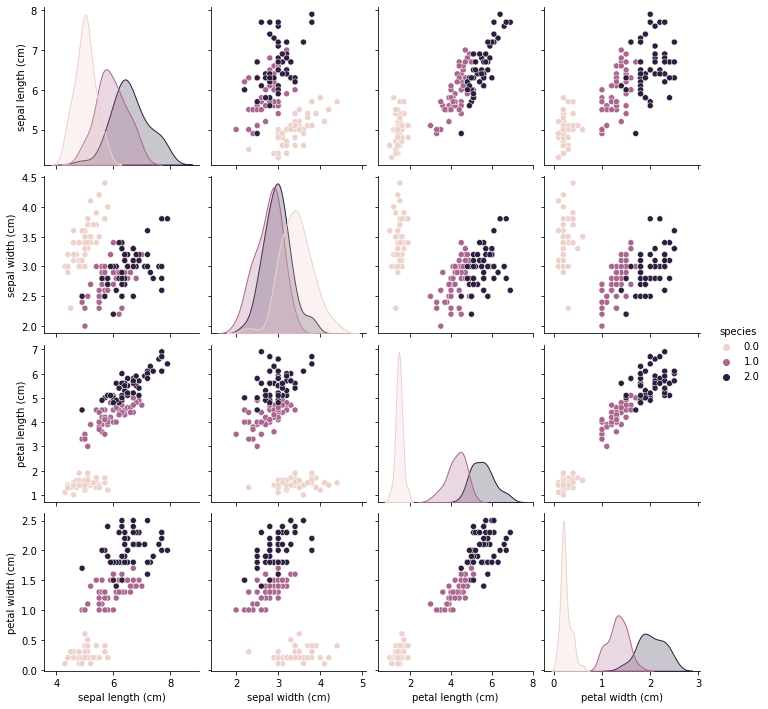

In [6]:
sns.pairplot(df, hue = 'species')

In [7]:
species = df["species"].tolist()

In [8]:
type(species)

list

In [9]:
X = df.drop(["species"], axis=1)

In [10]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [11]:
X = (X - X.mean()) / X.std(ddof=0)
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [12]:
X_corr = (1 / 150) * X.T.dot(X)
X_corr

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


Text(0.5, 1.0, 'Correlation matrix')

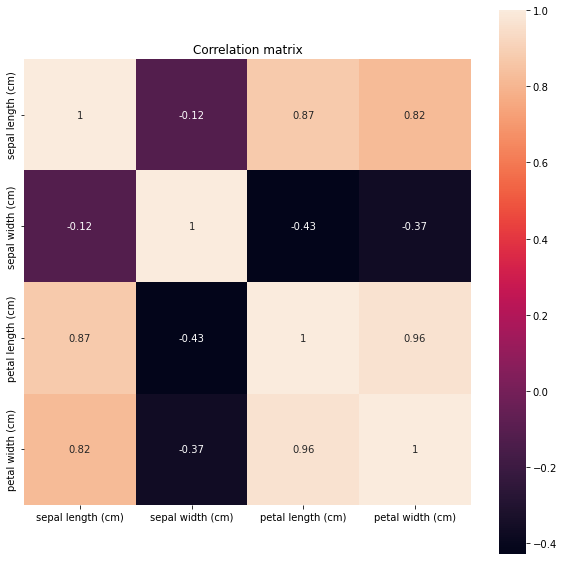

In [13]:
# Plotting the correlation matrix
plt.figure(figsize=(10,10))
sns.heatmap(X_corr, vmax=1, square=True,annot=True)
plt.title('Correlation matrix')

In [14]:
# method1
u,s,v = np.linalg.svd(X_corr)
eig_values, eig_vectors = s, u
eig_values, eig_vectors

(array([2.91849782, 0.91403047, 0.14675688, 0.02071484]),
 array([[-0.52106591, -0.37741762,  0.71956635,  0.26128628],
        [ 0.26934744, -0.92329566, -0.24438178, -0.12350962],
        [-0.5804131 , -0.02449161, -0.14212637, -0.80144925],
        [-0.56485654, -0.06694199, -0.63427274,  0.52359713]]))

In [15]:
pc1 = X.dot(eig_vectors[:,0])
pc2 = X.dot(eig_vectors[:,1])

In [16]:
pc1

0      2.264703
1      2.080961
2      2.364229
3      2.299384
4      2.389842
         ...   
145   -1.870503
146   -1.564580
147   -1.521170
148   -1.372788
149   -0.960656
Length: 150, dtype: float64

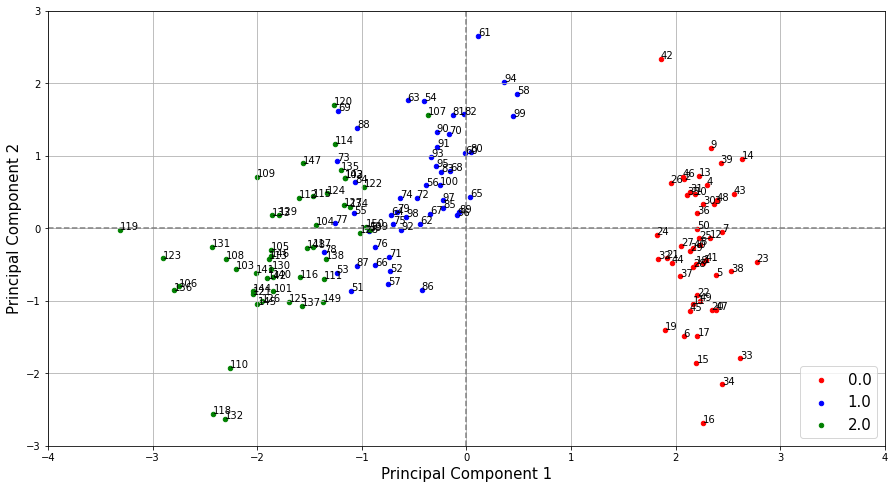

In [17]:
def plot_scatter(pc1, pc2):
    fig, ax = plt.subplots(figsize=(15, 8))
    
    species_unique = list(set(species))
    species_colors = ["r","b","g"]
    
    for i, spec in enumerate(species):
        plt.scatter(pc1[i], pc2[i], label = spec, s = 20, c=species_colors[species_unique.index(spec)])
        ax.annotate(str(i+1), (pc1[i],pc2[i]))
    
    from collections import OrderedDict
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = OrderedDict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys(), prop={'size': 15}, loc=4)
    
    ax.set_xlabel('Principal Component 1', fontsize = 15)
    ax.set_ylabel('Principal Component 2', fontsize = 15)
    ax.axhline(y=0, color="grey", linestyle="--")
    ax.axvline(x=0, color="grey", linestyle="--")
    
    plt.grid()
    plt.axis([-4, 4, -3, 3])
    plt.show()
    
plot_scatter(pc1, pc2)